## Predict Risk Tolerance

### Objective:
- This project's main objective is to generate machine learning and/or deep learning models to predict a person's level of risk tolerance.
- Este projeto tem como objetivo principal gerar modelos de machine learning e/ou deep learning para predizer o nível de tolerância ao risco de uma pessoa.

### Data Origin:
- Dataset: https://www.federalreserve.gov/econres/scfindex.htm
The data is a dataset with financial information from the 2022 Survey of Consumer Finances (SCF) being the most recent survey conducted by the US Federal Reserve.
- Os dados são um conjunto de dados com informações financeiras da pesquisa de Finanças do Consumidor (SCF) de 2022 sendo a pesquisa mais recente realizada pelo Federal Reserve dos EUA.

- ## Análise exploratória dos dados
- ## Preparação dos dados
- ## Armazenamento dos dados tratados

In [1]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning

In [2]:
# métricas de verificação
from scipy.stats import skew # verifica se a base do sino da distribuição normal está entre -2 e 2 que é o limite viável
from scipy.stats import kurtosis # verifica se o cume do sino da distribuição normal está entre -2 e 2 (limite viável)

In [3]:
# preparação e visualização de dados
from sklearn.preprocessing import StandardScaler 
                    # faz a padronização dos dados para melhorar a normalidade (média=0 e variância=1)
                    # sensível a outliers

from sklearn.compose import ColumnTransformer # Aplica transformadores a colunas de um array ou pandas DataFrame

from fc import fc_retira_outliers as rto # função que retira outliers

from matplotlib import pyplot # plotagem gráfica
import seaborn as sns # plotagem gráfica baseada em matplotlib

In [4]:
# carregando arquivo de dados de cotações financeiras
df_risk = pd.read_csv('dataset/SCFP2022.csv', sep=',')

In [5]:
# verificando o tamanho do arquivo, conferindo a quantidade de linhas e colunas
df_risk.shape

(22975, 357)

In [6]:
# reconhecendo as variáveis disponíveis
df_risk.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22975 entries, 0 to 22974
Data columns (total 357 columns):
 #    Column         Dtype  
---   ------         -----  
 0    YY1            int64  
 1    Y1             int64  
 2    WGT            float64
 3    HHSEX          int64  
 4    AGE            int64  
 5    AGECL          int64  
 6    EDUC           int64  
 7    EDCL           int64  
 8    MARRIED        int64  
 9    KIDS           int64  
 10   LF             int64  
 11   LIFECL         int64  
 12   FAMSTRUCT      int64  
 13   RACECL         int64  
 14   RACECL4        int64  
 15   RACECL5        int64  
 16   RACECL_EX      int64  
 17   RACE           int64  
 18   OCCAT1         int64  
 19   OCCAT2         int64  
 20   INDCAT         int64  
 21   FOODHOME       int64  
 22   FOODAWAY       int64  
 23   FOODDELV       int64  
 24   RENT           float64
 25   INCOME         float64
 26   WAGEINC        float64
 27   BUSSEFARMINC   float64
 28   INTDIVINC     

In [7]:
# reconhecendo os dados do dataframe
df_risk.head(5)

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,LF,LIFECL,FAMSTRUCT,RACECL,RACECL4,RACECL5,RACECL_EX,RACE,OCCAT1,OCCAT2,INDCAT,FOODHOME,FOODAWAY,FOODDELV,RENT,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,SSRETINC,TRANSFOTHINC,PENACCTWD,NORMINC,WSAVED,SAVED,SAVRES1,SAVRES2,SAVRES3,SAVRES4,SAVRES5,SAVRES6,SAVRES7,SAVRES8,SAVRES9,SPENDMOR,SPENDLESS,EXPENSHILO,LATE,LATE60,HPAYDAY,BNKRUPLAST5,KNOWL,YESFINRISK,NOFINRISK,CRDAPP,TURNDOWN,FEARDENIAL,TURNFEAR,FORECLLAST5,EMERGBORR,EMERGSAV,EMERGPSTP,EMERGCUT,EMERGWORK,HBORRFF,HBORRCC,HBORRALT,HBORRFIN,HSAVFIN,HSAVNFIN,HPSTPPAY,HPSTPLN,HPSTPOTH,HCUTFOOD,HCUTENT,HCUTOTH,FINLIT,BSHOPNONE,BSHOPGRDL,BSHOPMODR,ISHOPNONE,ISHOPGRDL,ISHOPMODR,BCALL,BMAGZNEWS,BMAILADTV,BINTERNET,BFRIENDWORK,BFINPRO,BSELF,BDONT,BOTHER,ICALL,IMAGZNEWS,IMAILADTV,IINTERNET,IFRIENDWORK,IFINPRO,ISELF,IDONT,IOTHER,BFINPLAN,IFINPLAN,INTERNET,CHECKING,HCHECK,NOCHK,EHCHKG,WHYNOCKG,DONTWRIT,MINBAL,DONTLIKE,SVCCHG,CANTMANG,NOMONEY,CREDIT,DONTWANT,OTHER,CKLOCATION,CKLOWFEEBAL,CKMANYSVCS,CKRECOMFRND,CKPERSONAL,CKCONNECTN,CKLONGTIME,CKSAFETY,CKCONVPAYRL,CKOTHCHOOSE,PREPAID,SAVING,HSAVING,MMDA,MMMF,MMA,HMMA,CALL,HCALL,LIQ,HLIQ,CDS,HCDS,STMUTF,TFBMUTF,GBMUTF,OBMUTF,COMUTF,OMUTF,NMMF,HNMMF,STOCKS,HSTOCKS,NSTOCKS,WILSH,NOTXBND,MORTBND,GOVTBND,OBND,BOND,HBOND,IRAKH,THRIFT,FUTPEN,CURRPEN,RETQLIQ,HRETQLIQ,ANYPEN,DBPLANCJ,DCPLANCJ,DBPLANT,BPLANCJ,SAVBND,HSAVBND,CASHLI,HCASHLI,ANNUIT,TRUSTS,OTHMA,HOTHMA,OTHFIN,HOTHFIN,EQUITY,HEQUITY,DEQ,RETEQ,EQUITINC,HBROK,HTRAD,NTRAD,FIN,HFIN,VEHIC,HVEHIC,BUSVEH,NBUSVEH,OWN,NOWN,LEASE,NLEASE,VLEASE,NVEHIC,NEWCAR1,NEWCAR2,FARMBUS,HOUSES,HHOUSES,HOUSECL,ORESRE,HORESRE,NNRESRE,HNNRESRE,BUS,ACTBUS,NONACTBUS,HBUS,OTHNFIN,HOTHNFIN,NFIN,HNFIN,NHNFIN,ASSET,HASSET,HELOC,MRTHEL,NH_MORT,HOMEEQ,HMRTHEL,HHELOC,HNH_MORT,HPRIM_MORT,PURCH1,REFIN_EVER,HEXTRACT_EVER,HSEC_MORT,PURCH2,HMORT2,HELOC_YN,OTHLOC,HOTHLOC,MORT1,MORT2,MORT3,RESDBT,HRESDBT,CCBAL,NOCCBAL,HCCBAL,BNPL,NOBNPL,HBNPL,VEH_INST,EDN_INST,INSTALL,OTH_INST,HVEH_INST,HEDN_INST,HOTH_INST,HINSTALL,ODEBT,HODEBT,DEBT,HDEBT,NETWORTH,LEVRATIO,DEBT2INC,KGHOUSE,KGORE,KGBUS,FARMBUS_KG,KGSTMF,KGTOTAL,PAYMORT1,PAYMORT2,PAYMORT3,PAYMORTO,PAYLOC1,PAYLOC2,PAYLOC3,PAYLOCO,PAYHI1,PAYHI2,PAYLC1,PAYLC2,PAYLCO,PAYORE1,PAYORE2,PAYOREV,PAYORE3,PAYVEH1,PAYVEH2,PAYVEH3,PAYVEH4,PAYVEHM,PAYVEO1,PAYVEO2,PAYVEOM,PAYEDU1,PAYEDU2,PAYEDU3,PAYEDU4,PAYEDU5,PAYEDU6,PAYEDU7,PAYILN1,PAYILN2,PAYILN3,PAYILN4,PAYILN5,PAYILN6,PAYILN7,PAYMARG,PAYINS,PAYPEN1,PAYPEN2,PAYPEN3,PAYPEN4,PAYPEN5,PAYPEN6,TPAY,MORTPAY,CONSPAY,REVPAY,PIRTOTAL,PIRMORT,PIRCONS,PIRREV,PIR40,PLOAN1,PLOAN2,PLOAN3,PLOAN4,PLOAN5,PLOAN6,PLOAN7,PLOAN8,LLOAN1,LLOAN2,LLOAN3,LLOAN4,LLOAN5,LLOAN6,LLOAN7,LLOAN8,LLOAN9,LLOAN10,LLOAN11,LLOAN12,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,0,6,1,1,1,1,99,1,3,4,4,600,0,840,0.0,38804.734469,0.0,0.0,54.045591,0.0,38804.734469,0.0,6377.379759,38804.734469,3,1,0,0,0,0,0,1,0,0,0,5,5,3,0,0,0,0,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,6700,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6400,1,0,0,0,0,0,0,13100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,41800,0,0,0,0,0,0,245000,0,0,0,245000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49000.0,1,0,49000.0,1.262733,0,0,0,258100,1,25000,1,0,0,1,1,0,0,0,1,1,1,0,674000,1,1,0,0,0.0,0,0,0,0,0,0,0,699000.0,1,25000.0,957100.0,1,0,195000,195000,479000,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,195000,1,762100.0,0.203740,5.025160,65000.0,0.0,0.0,0.0,0,65000.0,1600.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0,0,0.0,0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,1600.0,1600.0,0.0,0.0,0.494785,0.494785,0.0,0.0,1,195000,0,0,0,0,0,0,0,195000,0,0,0,0,0,0,0,0,0,0,0,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,0,6,1,1,1,1,99,1,3,4,4,600,0,960,0.0,38264.278557,0.0,0.0,54.045591,0.0,37183.366733,0.0,4756.012024,38264.278557,3,1,0,0,0,0,0,1,0,0,0,5,5,3,0,0,0,0,5,0,0,1,0,0,0,0,

In [8]:
# verificando e confirmando colunas com nulos no dataframe
df_risk.isnull().sum()[df_risk.isnull().sum()>0]

Series([], dtype: int64)

- Confirmamos que não há nulos e fizemos isso com a função .isnull().sum() somando as ocorrências de valores nulos que existem no dataframe.

In [9]:
# verificando a duplicidade de alguma linha
df_risk.duplicated().sum()

0

- Verificamos que não há linhas duplicadas, havendo uma preservação do tamanho do dataframe até agora.

In [10]:
# calculando ativos arriscados e não arriscados 
df_risk['sem_risco']= \
	df_risk['LIQ'] + \
	df_risk['CDS'] + \
	df_risk['SAVBND'] + \
	df_risk['CASHLI'] 

df_risk['com_risco'] = \
	df_risk['NMMF'] + \
	df_risk['STOCKS'] + \
	df_risk['BOND']

In [11]:
# calculando a tolerância ao risco
df_risk['tolerancia_risco'] = \
    df_risk['com_risco']/ \
        (df_risk['com_risco']+df_risk['sem_risco'])

In [12]:
# verificando as tolerâncias calculadas
print(df_risk.tolerancia_risco.head(20))

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.999819
11    0.999859
12    0.999862
13    0.999726
14    0.999762
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
Name: tolerancia_risco, dtype: float64


In [13]:
# verificando e confirmando colunas com nulos no dataframe após o calculo de tolerância
df_risk.isnull().sum()[df_risk.isnull().sum()>0]

tolerancia_risco    318
dtype: int64

In [14]:
# criando a feature risk, disposição em assumir risco (de 4 a 1 crescente)
# 4 - baixa
# 3 - média
# 2 - alta
# 1 - muito tolerante
def classifica_risco(tolerancia_risco):
    if tolerancia_risco > 0.75: return 1
    elif tolerancia_risco > 0.50: return 2
    elif tolerancia_risco > 0.25: return 3
    else: return 4

In [15]:
# criando a feature risk, disposição em assumir risco (de 4 a 1 crescente)
df_risk['RISK'] = df_risk['tolerancia_risco'].apply(classifica_risco)

In [16]:
# verificando os riscos criados
df_risk.RISK.value_counts()

RISK
4    16139
1     3791
2     1676
3     1369
Name: count, dtype: int64

In [17]:
# verificando os dados do risco criado
df_risk.head(5)

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,LF,LIFECL,FAMSTRUCT,RACECL,RACECL4,RACECL5,RACECL_EX,RACE,OCCAT1,OCCAT2,INDCAT,FOODHOME,FOODAWAY,FOODDELV,RENT,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,SSRETINC,TRANSFOTHINC,PENACCTWD,NORMINC,WSAVED,SAVED,SAVRES1,SAVRES2,SAVRES3,SAVRES4,SAVRES5,SAVRES6,SAVRES7,SAVRES8,SAVRES9,SPENDMOR,SPENDLESS,EXPENSHILO,LATE,LATE60,HPAYDAY,BNKRUPLAST5,KNOWL,YESFINRISK,NOFINRISK,CRDAPP,TURNDOWN,FEARDENIAL,TURNFEAR,FORECLLAST5,EMERGBORR,EMERGSAV,EMERGPSTP,EMERGCUT,EMERGWORK,HBORRFF,HBORRCC,HBORRALT,HBORRFIN,HSAVFIN,HSAVNFIN,HPSTPPAY,HPSTPLN,HPSTPOTH,HCUTFOOD,HCUTENT,HCUTOTH,FINLIT,BSHOPNONE,BSHOPGRDL,BSHOPMODR,ISHOPNONE,ISHOPGRDL,ISHOPMODR,BCALL,BMAGZNEWS,BMAILADTV,BINTERNET,BFRIENDWORK,BFINPRO,BSELF,BDONT,BOTHER,ICALL,IMAGZNEWS,IMAILADTV,IINTERNET,IFRIENDWORK,IFINPRO,ISELF,IDONT,IOTHER,BFINPLAN,IFINPLAN,INTERNET,CHECKING,HCHECK,NOCHK,EHCHKG,WHYNOCKG,DONTWRIT,MINBAL,DONTLIKE,SVCCHG,CANTMANG,NOMONEY,CREDIT,DONTWANT,OTHER,CKLOCATION,CKLOWFEEBAL,CKMANYSVCS,CKRECOMFRND,CKPERSONAL,CKCONNECTN,CKLONGTIME,CKSAFETY,CKCONVPAYRL,CKOTHCHOOSE,PREPAID,SAVING,HSAVING,MMDA,MMMF,MMA,HMMA,CALL,HCALL,LIQ,HLIQ,CDS,HCDS,STMUTF,TFBMUTF,GBMUTF,OBMUTF,COMUTF,OMUTF,NMMF,HNMMF,STOCKS,HSTOCKS,NSTOCKS,WILSH,NOTXBND,MORTBND,GOVTBND,OBND,BOND,HBOND,IRAKH,THRIFT,FUTPEN,CURRPEN,RETQLIQ,HRETQLIQ,ANYPEN,DBPLANCJ,DCPLANCJ,DBPLANT,BPLANCJ,SAVBND,HSAVBND,CASHLI,HCASHLI,ANNUIT,TRUSTS,OTHMA,HOTHMA,OTHFIN,HOTHFIN,EQUITY,HEQUITY,DEQ,RETEQ,EQUITINC,HBROK,HTRAD,NTRAD,FIN,HFIN,VEHIC,HVEHIC,BUSVEH,NBUSVEH,OWN,NOWN,LEASE,NLEASE,VLEASE,NVEHIC,NEWCAR1,NEWCAR2,FARMBUS,HOUSES,HHOUSES,HOUSECL,ORESRE,HORESRE,NNRESRE,HNNRESRE,BUS,ACTBUS,NONACTBUS,HBUS,OTHNFIN,HOTHNFIN,NFIN,HNFIN,NHNFIN,ASSET,HASSET,HELOC,MRTHEL,NH_MORT,HOMEEQ,HMRTHEL,HHELOC,HNH_MORT,HPRIM_MORT,PURCH1,REFIN_EVER,HEXTRACT_EVER,HSEC_MORT,PURCH2,HMORT2,HELOC_YN,OTHLOC,HOTHLOC,MORT1,MORT2,MORT3,RESDBT,HRESDBT,CCBAL,NOCCBAL,HCCBAL,BNPL,NOBNPL,HBNPL,VEH_INST,EDN_INST,INSTALL,OTH_INST,HVEH_INST,HEDN_INST,HOTH_INST,HINSTALL,ODEBT,HODEBT,DEBT,HDEBT,NETWORTH,LEVRATIO,DEBT2INC,KGHOUSE,KGORE,KGBUS,FARMBUS_KG,KGSTMF,KGTOTAL,PAYMORT1,PAYMORT2,PAYMORT3,PAYMORTO,PAYLOC1,PAYLOC2,PAYLOC3,PAYLOCO,PAYHI1,PAYHI2,PAYLC1,PAYLC2,PAYLCO,PAYORE1,PAYORE2,PAYOREV,PAYORE3,PAYVEH1,PAYVEH2,PAYVEH3,PAYVEH4,PAYVEHM,PAYVEO1,PAYVEO2,PAYVEOM,PAYEDU1,PAYEDU2,PAYEDU3,PAYEDU4,PAYEDU5,PAYEDU6,PAYEDU7,PAYILN1,PAYILN2,PAYILN3,PAYILN4,PAYILN5,PAYILN6,PAYILN7,PAYMARG,PAYINS,PAYPEN1,PAYPEN2,PAYPEN3,PAYPEN4,PAYPEN5,PAYPEN6,TPAY,MORTPAY,CONSPAY,REVPAY,PIRTOTAL,PIRMORT,PIRCONS,PIRREV,PIR40,PLOAN1,PLOAN2,PLOAN3,PLOAN4,PLOAN5,PLOAN6,PLOAN7,PLOAN8,LLOAN1,LLOAN2,LLOAN3,LLOAN4,LLOAN5,LLOAN6,LLOAN7,LLOAN8,LLOAN9,LLOAN10,LLOAN11,LLOAN12,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT,sem_risco,com_risco,tolerancia_risco,RISK
0,1,11,3027.956120,2,70,5,9,3,2,2,0,6,1,1,1,1,99,1,3,4,4,600,0,840,0.0,38804.734469,0.0,0.0,54.045591,0.0,38804.734469,0.0,6377.379759,38804.734469,3,1,0,0,0,0,0,1,0,0,0,5,5,3,0,0,0,0,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,6700,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6400,1,0,0,0,0,0,0,13100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,41800,0,0,0,0,0,0,245000,0,0,0,245000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49000.0,1,0,49000.0,1.262733,0,0,0,258100,1,25000,1,0,0,1,1,0,0,0,1,1,1,0,674000,1,1,0,0,0.0,0,0,0,0,0,0,0,699000.0,1,25000.0,957100.0,1,0,195000,195000,479000,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,195000,1,762100.0,0.203740,5.025160,65000.0,0.0,0.0,0.0,0,65000.0,1600.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0,0,0.0,0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,1600.0,1600.0,0.0,0.0,0.494785,0.494785,0.0,0.0,1,195000,0,0,0,0,0,0,0,195000,0,0,0,0,0,0,0,0,0,0,0,4,2,4,2,1,8,3,3,2,1,13100,0,0.0,4
1,1,12,3054.900065,2,70,5,9,3,2,2,0,6,1,1,1,1,99,1,3,4,4,600,0,960,0.0,38264.278557,0.0,0.0,54.045591,0.0,37183.366733,0.0,4756.012024,38264.278

In [18]:
# verificando o tambanho do dataframe linhas x colunas
df_risk.shape

(22975, 361)

In [19]:
# apagando as linhas com nulos
df_risk = df_risk.dropna(axis=0)

In [20]:
# verificando quantas linhas sobraram
df_risk.shape

(22657, 361)

In [21]:
# verificando se sobrou algum nulo
df_risk.isnull().sum()[df_risk.isnull().sum()>0]

Series([], dtype: int64)

<Axes: xlabel='tolerancia_risco'>

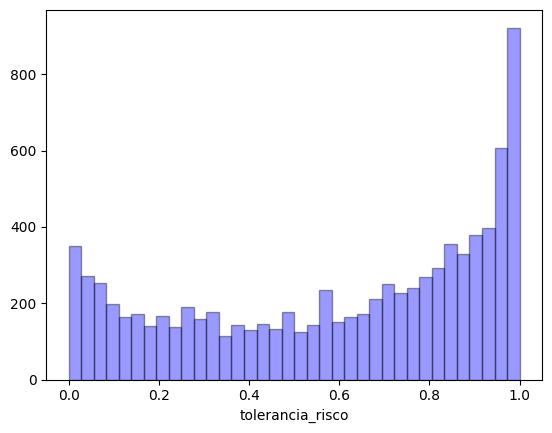

In [22]:
# verificando a distribuição dos dados da tolerância de risco, foi ignorada a tolerância = 0
sns.distplot(df_risk['tolerancia_risco'][df_risk['tolerancia_risco']>0], hist=True, kde=False, bins=int(180/5), \
             color = 'blue', hist_kws={'edgecolor':'black'})

In [23]:
# selecionando features especificas para o estudo
lista_manter = ['tolerancia_risco', 'AGE','EDCL','MARRIED','KIDS','OCCAT1','INCOME', 'RISK','NETWORTH'] 
lista_apagar = [col for col in df_risk.columns if col not in lista_manter] 
df_risk_ok = df_risk
df_risk_ok.drop(labels=lista_apagar, axis=1, inplace=True)

In [24]:
# verificando as primeiras linhas das featuras selecionadas
df_risk_ok.head(5)

,AGE,EDCL,MARRIED,KIDS,OCCAT1,INCOME,NETWORTH,tolerancia_risco,RISK
0,70,3,2,2,3,38804.734469,762100.0,0.0,4
1,70,3,2,2,3,38264.278557,854300.0,0.0,4
2,70,3,2,2,3,36102.454910,678200.0,0.0,4
3,70,3,2,2,3,33508.266533,279600.0,0.0,4
4,70,3,2,2,3,35561.998998,602600.0,0.0,4


In [25]:
# eliminando as linhas com tolerância = 0
df_risk_ok = df_risk_ok[df_risk_ok['tolerancia_risco']>0]
df_risk_ok.shape

(8691, 9)

<Axes: title={'center': 'Correlation Matrix'}>

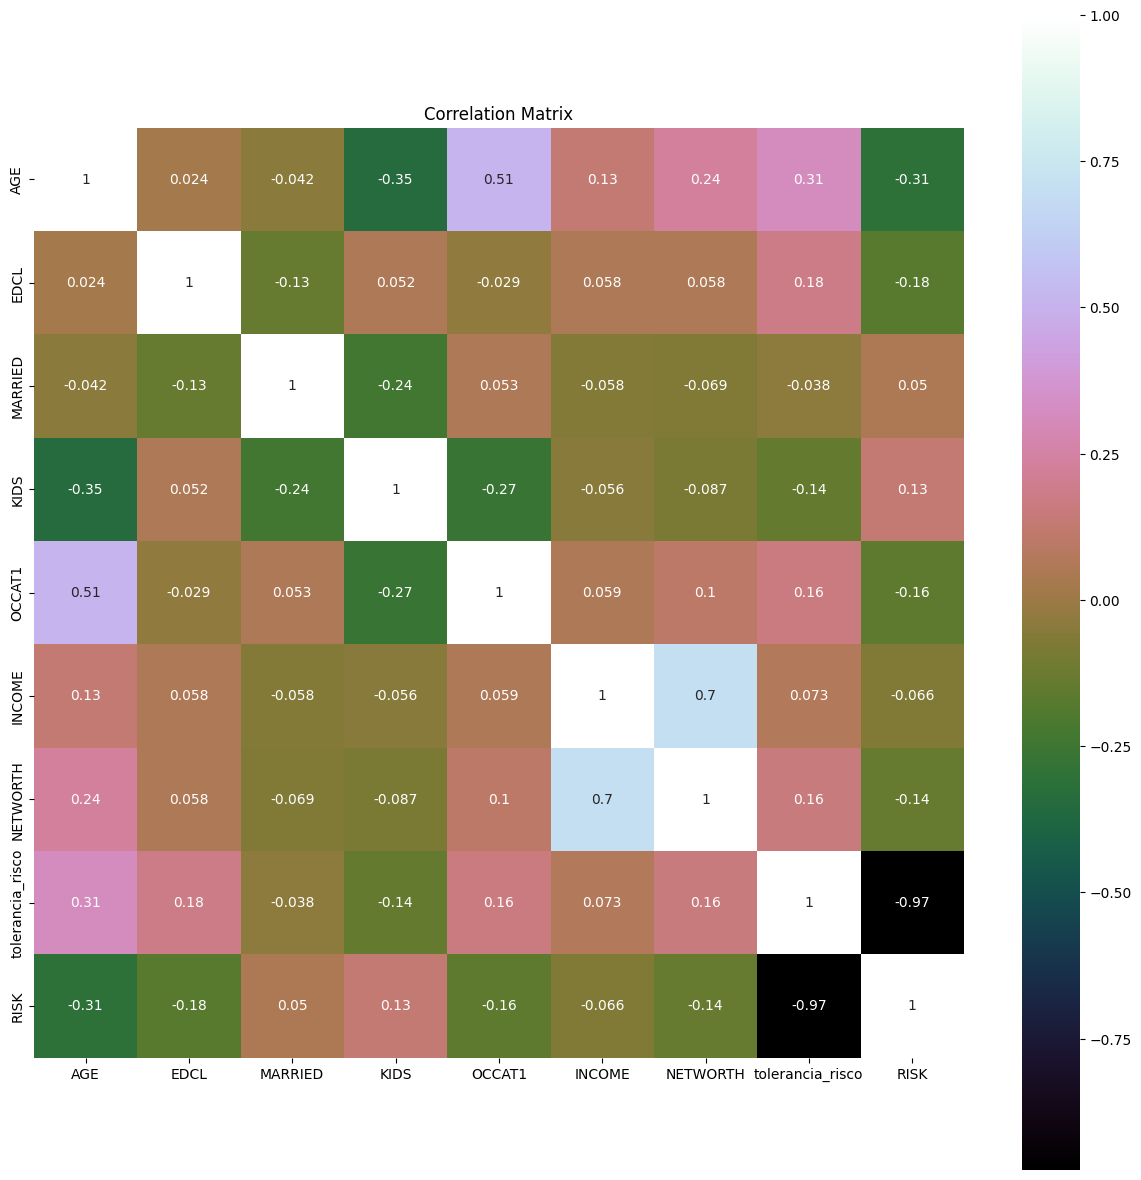

In [26]:
# verificando a correlação entre as variáveis
correlation = df_risk_ok.corr()
pyplot.figure(figsize=(15,15)) 
pyplot.title('Correlation Matrix') 
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [27]:
# verificando distribuição % nas variáveis categoricas
print(df_risk_ok.EDCL.value_counts(normalize=True)*100)
print('')
print(df_risk_ok.MARRIED.value_counts(normalize=True)*100)
print('')
print(df_risk_ok.KIDS.value_counts(normalize=True).head(20)*100)
print('')
print(df_risk_ok.OCCAT1.value_counts(normalize=True)*100)
print('')
print(df_risk_ok.RISK.value_counts(normalize=True)*100)

EDCL
4    77.033713
3    13.117018
2     8.549074
1     1.300196
Name: proportion, dtype: float64

MARRIED
1    78.805661
2    21.194339
Name: proportion, dtype: float64

KIDS
0    64.825682
1    14.566793
2    13.991485
3     4.659993
4     1.668393
5     0.230123
6     0.057531
Name: proportion, dtype: float64

OCCAT1
1    41.951444
2    35.105281
3    21.079277
4     1.863997
Name: proportion, dtype: float64

RISK
1    43.619837
4    21.343919
2    19.284317
3    15.751927
Name: proportion, dtype: float64


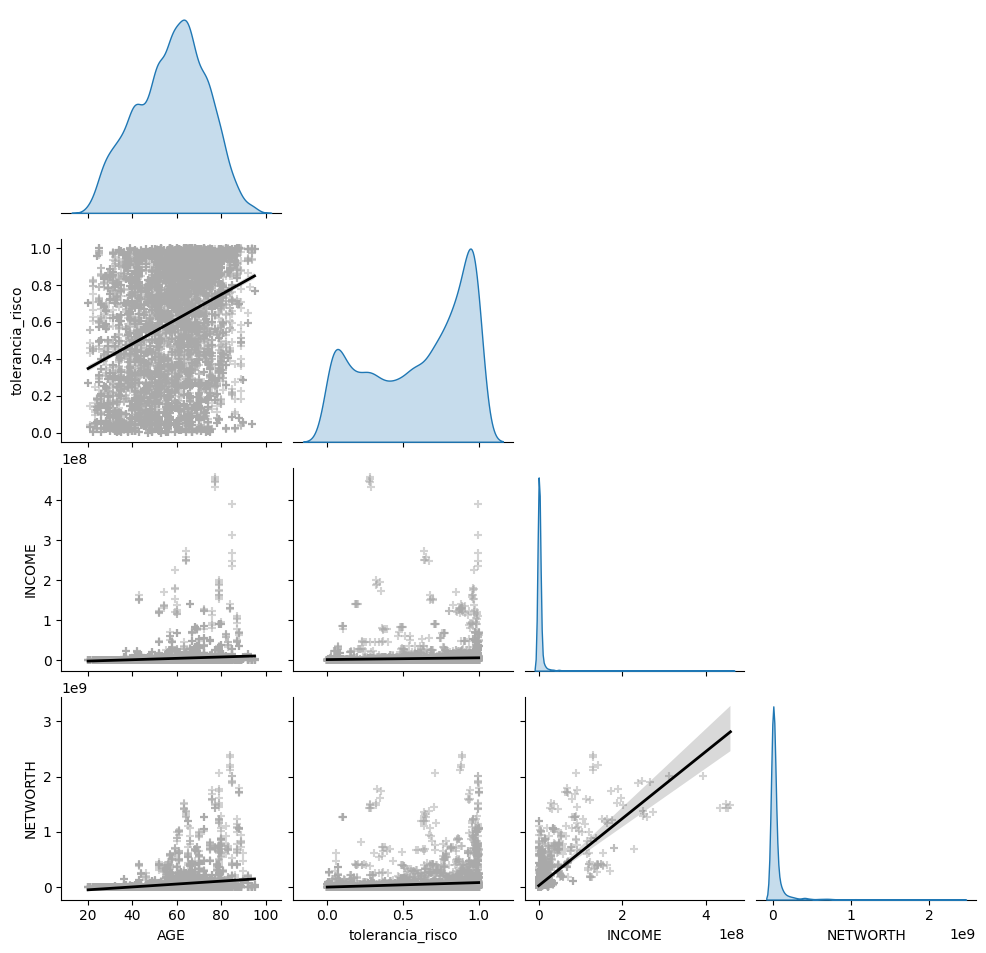

In [28]:
# verificando a dispersão das variáveis
# verificando a distribuição dos dados
p= sns.pairplot(
   df_risk_ok[['AGE','tolerancia_risco','INCOME','NETWORTH']],
                diag_kind="kde", corner=True, markers="+",
                plot_kws={'line_kws':{'lw': 2, 'color':'#000000'}, 
                           'scatter_kws': {'alpha': 0.5, 
                                           'color': '#A9A9A9'}},
                kind='reg'
                )
p.fig.subplots_adjust(top=0.95)

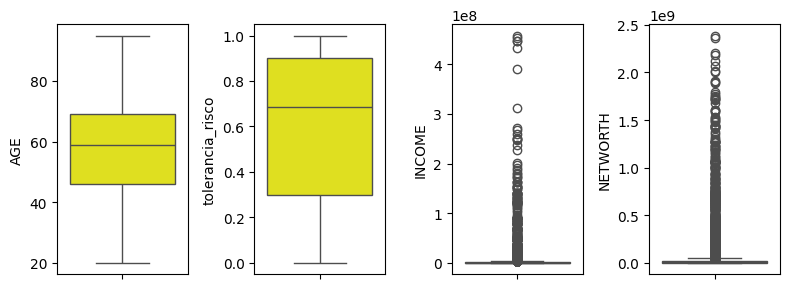

In [29]:
# visualizando boxplot para ver a distribuição nos quartis e a existência de outliers
fig, axs = pyplot.subplots(nrows=1, ncols=4, figsize=(8, 3), tight_layout=True)

search_outliers = ['AGE','tolerancia_risco','INCOME','NETWORTH']

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df_risk_ok, ax=axs[i], color='yellow')
pyplot.show()

In [30]:
# chama função rto para retirar outliers, vamos passar mais de uma vez para reduzir os outliers
df_risk_ok = rto.retira_outliers(df_risk_ok)
df_risk_ok = rto.retira_outliers(df_risk_ok)
df_risk_ok = rto.retira_outliers(df_risk_ok)
df_risk_ok = rto.retira_outliers(df_risk_ok)
df_risk_ok = rto.retira_outliers(df_risk_ok)
df_risk_ok = rto.retira_outliers(df_risk_ok)
df_risk_ok = rto.retira_outliers(df_risk_ok)
df_risk_ok = rto.retira_outliers(df_risk_ok)
df_risk_ok = rto.retira_outliers(df_risk_ok)
df_risk_ok = rto.retira_outliers(df_risk_ok)
df_risk_ok.shape

(3930, 9)

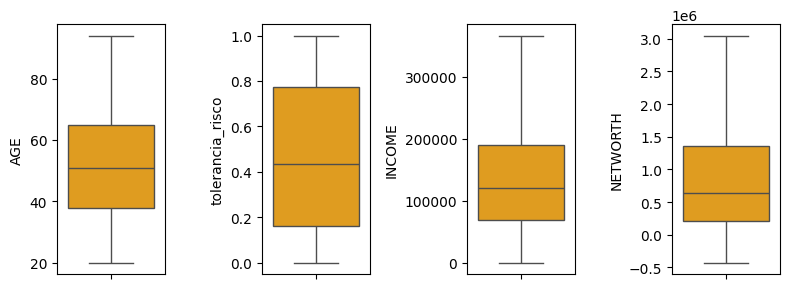

In [31]:
# visualizando boxplot para ver a distribuição nos quartis e a retirada de outliers
fig, axs = pyplot.subplots(nrows=1, ncols=4, figsize=(8, 3), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df_risk_ok, ax=axs[i], color='orange')
pyplot.show()

In [32]:
# verificando distribuição % nas variáveis categoricas
print(df_risk_ok.EDCL.value_counts(normalize=True)*100)
print('')
print(df_risk_ok.MARRIED.value_counts(normalize=True)*100)
print('')
print(df_risk_ok.KIDS.value_counts(normalize=True).head(20)*100)
print('')
print(df_risk_ok.OCCAT1.value_counts(normalize=True)*100)
print('')
print(df_risk_ok.RISK.value_counts(normalize=True)*100)

EDCL
4    63.002545
3    20.966921
2    13.536896
1     2.493639
Name: proportion, dtype: float64

MARRIED
1    66.793893
2    33.206107
Name: proportion, dtype: float64

KIDS
0    63.027990
2    15.674300
1    15.470738
3     4.020356
4     1.297710
5     0.508906
Name: proportion, dtype: float64

OCCAT1
1    61.221374
3    20.941476
2    14.605598
4     3.231552
Name: proportion, dtype: float64

RISK
4    34.351145
1    26.386768
3    21.043257
2    18.218830
Name: proportion, dtype: float64


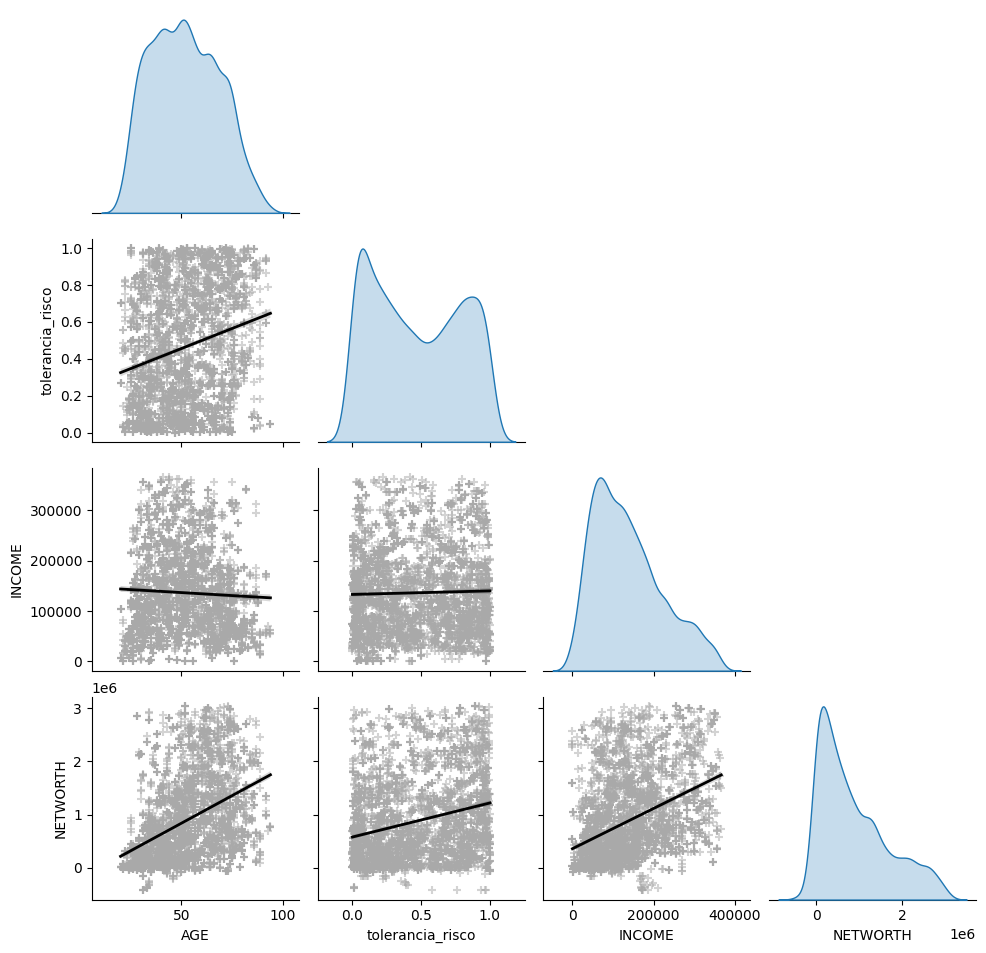

In [33]:
# verificando a dispersão das variáveis
# verificando a distribuição dos dados
p= sns.pairplot(
   df_risk_ok[['AGE','tolerancia_risco','INCOME','NETWORTH']],
                diag_kind="kde", corner=True, markers="+",
                plot_kws={'line_kws':{'lw': 2, 'color':'#000000'}, 
                           'scatter_kws': {'alpha': 0.5, 
                                           'color': '#A9A9A9'}},
                kind='reg'
                )
p.fig.subplots_adjust(top=0.95)

In [34]:
# atualizando a numeração do indice do dataframe
df_risk_ok = df_risk_ok.reset_index()
df_risk_ok = df_risk_ok.drop('index', axis=1)

In [35]:
# verificando as primeiras linhas do dataframe
df_risk_ok.head(3)

,AGE,EDCL,MARRIED,KIDS,OCCAT1,INCOME,NETWORTH,tolerancia_risco,RISK
0,63.0,4,1,0,1,324273.54709,2391000.0,0.791073,1
1,63.0,4,1,0,1,324273.54709,2421310.0,0.791271,1
2,63.0,4,1,0,1,324273.54709,1957700.0,0.753915,1


In [36]:
# definindo uma instância do columnTransformer para fazer a transformação de variáveis
lista_transformer = ['AGE','INCOME','NETWORTH']

preprocessing = ColumnTransformer(
    [
        ("standard", StandardScaler(), list(lista_transformer))
    ]
)

preprocessing.fit_transform(df_risk_ok[lista_transformer],)

array([[ 0.67396086,  2.2179759 ,  1.88791657],
       [ 0.67396086,  2.2179759 ,  1.92563284],
       [ 0.67396086,  2.2179759 ,  1.34873936],
       ...,
       [ 0.25168   , -0.81861455, -0.81001022],
       [ 0.25168   , -0.69102671, -0.80948759],
       [ 0.25168   , -0.89516725, -0.80835523]])

In [37]:
# fazendo a transformação de variáveis com fit_transform e criando um novo dataframe
df_risk_ok_trans = pd.DataFrame(
    preprocessing.fit_transform(df_risk_ok[lista_transformer],),
    columns=preprocessing.get_feature_names_out(), 
)

In [38]:
# juntando o dataframe original com o dataframe gerado com variáveis transformadas
df_risk_ok_trans = pd.concat([df_risk_ok, df_risk_ok_trans], axis=1)

In [39]:
# verificando a ocorrência de nulos
df_risk_ok_trans.isnull().sum()

AGE                   0
EDCL                  0
MARRIED               0
KIDS                  0
OCCAT1                0
INCOME                0
NETWORTH              0
tolerancia_risco      0
RISK                  0
standard__AGE         0
standard__INCOME      0
standard__NETWORTH    0
dtype: int64

In [40]:
# verificando os dados das primeiras linhas dos dois dataframes juntados
df_risk_ok_trans.head(3)

,AGE,EDCL,MARRIED,KIDS,OCCAT1,INCOME,NETWORTH,tolerancia_risco,RISK,standard__AGE,standard__INCOME,standard__NETWORTH
0,63.0,4,1,0,1,324273.54709,2391000.0,0.791073,1,0.673961,2.217976,1.887917
1,63.0,4,1,0,1,324273.54709,2421310.0,0.791271,1,0.673961,2.217976,1.925633
2,63.0,4,1,0,1,324273.54709,1957700.0,0.753915,1,0.673961,2.217976,1.348739


Os dados contínuos AGE, INCOME e NETWORTH foram padronizados diminuindo a dimensionalidade e aumentando a normalidade da distribuição. Essa medida foi tomada para adequar os dados à dimensão dos demais dados do dataframe, procurando melhorar a performance de treinamento do modelo, como também melhorar o treinamento com regressão linear.

In [41]:
# verificando as novas colunas criadas e padronizadas
df_risk_ok_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE                 3930 non-null   float64
 1   EDCL                3930 non-null   int64  
 2   MARRIED             3930 non-null   int64  
 3   KIDS                3930 non-null   int64  
 4   OCCAT1              3930 non-null   int64  
 5   INCOME              3930 non-null   float64
 6   NETWORTH            3930 non-null   float64
 7   tolerancia_risco    3930 non-null   float64
 8   RISK                3930 non-null   int64  
 9   standard__AGE       3930 non-null   float64
 10  standard__INCOME    3930 non-null   float64
 11  standard__NETWORTH  3930 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 368.6 KB


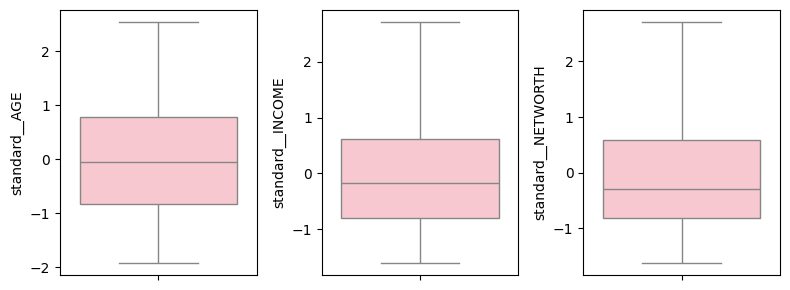

In [42]:
# visualizando boxplot para ver a distribuição nos quartis e a existência de outliers
fig, axs = pyplot.subplots(nrows=1, ncols=3, figsize=(8, 3), tight_layout=True)

list_standard = ['standard__AGE','standard__INCOME','standard__NETWORTH']

for i, column in enumerate(list_standard):
    sns.boxplot(y=column, data=df_risk_ok_trans, ax=axs[i], color='pink')
pyplot.show()

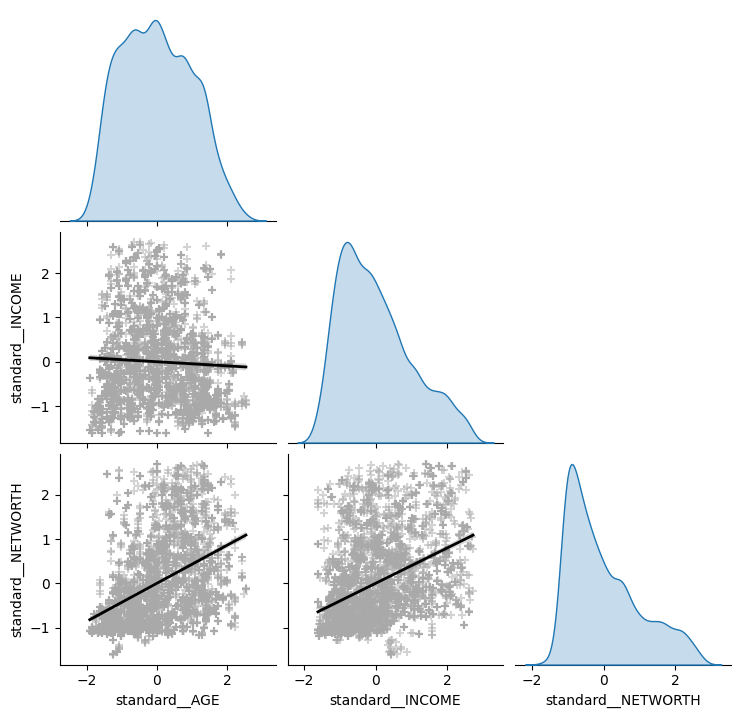

In [43]:
# verificando a dispersão das variáveis
# verificando a distribuição dos dados
p= sns.pairplot(
   df_risk_ok_trans[list_standard],
                diag_kind="kde", corner=True, markers="+",
                plot_kws={'line_kws':{'lw': 2, 'color':'#000000'}, 
                           'scatter_kws': {'alpha': 0.5, 
                                           'color': '#A9A9A9'}},
                kind='reg'
                )
p.fig.subplots_adjust(top=0.95)

In [44]:
# verificando os valores da skew e kurtosis das variáveis transformadas
# os valores aceitos tanto para skew quanto para kurtosis devem variar entre -2 e 2
df_skew_kurtosis_og = pd.DataFrame()
df_skew_kurtosis_og['variavel'] = 'Nan'
df_skew_kurtosis_og['skew'] = 'Nan'
df_skew_kurtosis_og['kurtosis'] = 'Nan'

for variavel in list(list_standard):
    skewx = skew(df_risk_ok_trans[variavel], axis=0, bias=True)
    kurtx = kurtosis(df_risk_ok_trans[variavel], axis=0, bias=True)

    dfx = {'variavel': [variavel], 'skew': [skewx], 'kurtosis': [kurtx]}
    dfx = pd.DataFrame(dfx)
    df_skew_kurtosis_og = pd.concat([df_skew_kurtosis_og, dfx], axis=0)    

    print('skew ' + variavel, skewx)
    print('kurtosis ' + variavel, kurtx)
    print('')   

skew standard__AGE 0.1911651522921959
kurtosis standard__AGE -0.8638749156547547

skew standard__INCOME 0.6805329789877934
kurtosis standard__INCOME -0.3105186806343023

skew standard__NETWORTH 0.8670735381773899
kurtosis standard__NETWORTH -0.23326030177657797



In [45]:
# preenchendo os valore nulos com zero
# resetando o indice
df_skew_kurtosis_og = df_skew_kurtosis_og.fillna(0)
df_skew_kurtosis_og = df_skew_kurtosis_og.reset_index()
df_skew_kurtosis_og = df_skew_kurtosis_og.drop('index', axis=1)
print(df_skew_kurtosis_og)

             variavel      skew  kurtosis
0       standard__AGE  0.191165 -0.863875
1    standard__INCOME  0.680533 -0.310519
2  standard__NETWORTH  0.867074 -0.233260


In [46]:
# incluindo colunas de valores mínimos e máximos para skew e kurtosis que serão plotados no gráfico
df_skew_kurtosis_og['max'] = 2
df_skew_kurtosis_og['min'] = -2

<Axes: title={'center': 'Valores de skews e kurtosis das variáveis transformadas'}, xlabel='variavel'>

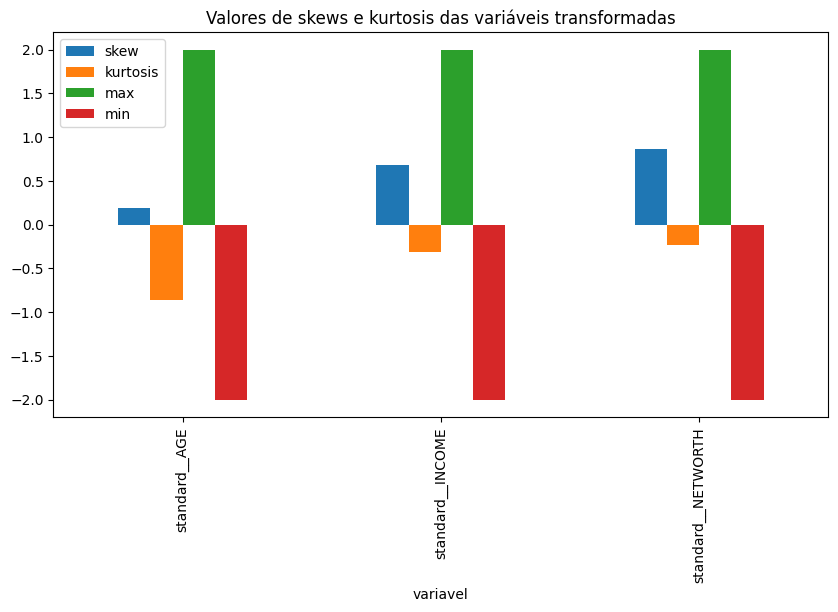

In [47]:
# plotando um gráfico para analisarmos os valores de skew e kurtosis
df_skew_kurtosis_og.plot(x='variavel', 
        kind='bar', 
        stacked=False, 
        title='Valores de skews e kurtosis das variáveis transformadas',
        figsize=(10,5))

- Observamos que todas das variáveis ficaram com os valores dentro do máximo e mínimo de skew e kurtosis, sendo assim tanto a base do sino(skew) quanto o topo(custosis) estão dentro do padrão para uma distribuição normal que serve para ser utilizada em algoritimos de modelos de regressão linear.

In [48]:
# salva os dados tratados em arquivo csv organizado pelo índice
df_risk_ok_trans.sort_index().to_csv('df_treated/df_risk_tolerance.csv', index=False)